# Titanic survived Project

## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Dataset Link
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [2]:
# Important library
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
# Loading the first 5 data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# loading the last 5 data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking the shape
df.shape

(891, 12)

Shape of dataset is 891 rows and 12 columns out of 12, 11 are features and 1 is label

In [6]:
# Checking the column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Checking the datatype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are int object and float data type in this dataset

In [8]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are null values in Age, cabin and Embarked and data type are float64(2), int64(5), object(5) and memory usage: 83.7+ KB

In [10]:
# Checking the null 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null value in Age,cabin,Embarked

In [11]:
# Checking the number of unique value and making dataframe
df.nunique().to_frame()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [12]:
# Checking the unique value in Embaked
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# Checking the data for null value in Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Dropping the columns

As the passengerId,name is unique for all the data which will not contribute in model building and cabin have 687 null values so we can't use it as feature

In [14]:
# Making new dataset afterdroping the columns
df2=df.drop(df[['PassengerId','Name','Cabin']],axis=1)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [15]:
# Checking the null values
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

## Encoding 

In [16]:
# Importing Label encoder
from sklearn.preprocessing import LabelEncoder

In [17]:
lab_enc=LabelEncoder()

In [18]:
# Encoding the sex
df3=lab_enc.fit_transform(df2['Sex'])
pd.Series(df3)
df2['Sex']=df3
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,S
887,1,1,0,19.0,0,0,112053,30.0000,S
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,1,26.0,0,0,111369,30.0000,C


Encoded sex male as 1 and female as 0

In [19]:
# Encoding the Embarked
df3=lab_enc.fit_transform(df2['Embarked'])
pd.Series(df3)
df2['Embarked']=df3
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,2
887,1,1,0,19.0,0,0,112053,30.0000,2
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,2
889,1,1,1,26.0,0,0,111369,30.0000,0


- **S**=2
- **C**=0
- **Q**=1
- **null** = 3

In [20]:
# Rechecking the null values
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

Emabrked shows 0 null values but it had 2 nulls which is also encoded

In [21]:
# Checking the value count
df2.Embarked.value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

As we can see 3 is encoded 2 time these were the null values so we are replacing it back to null

In [22]:
# Replacing 3 with null
import numpy as np
df2.Embarked=df2.Embarked.replace(3,np.nan)

In [23]:
# Checking the null value again
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

now we can see we have 2 null value in Embarked

## Imputation

In [24]:
# importing the KNN Imputer
from sklearn.impute import KNNImputer

In [25]:
# Imputing Embarked with fare column 
knnimp=KNNImputer(n_neighbors=5)
knn_imp=pd.DataFrame(knnimp.fit_transform(df2[['Fare','Embarked']]))
knn_imp

,0,1
0,7.2500,2.0
1,71.2833,0.0
2,7.9250,2.0
3,53.1000,2.0
4,8.0500,2.0
...,...,...
886,13.0000,2.0
887,30.0000,2.0
888,23.4500,2.0
889,30.0000,0.0


In [26]:
# Checking the Imputaion value for null value
knn_imp.iloc[[61,829]]

,0,1
61,80.0,1.2
829,80.0,1.2


## Doing another Imputation using Iterative imputer

In [27]:
# Before Using Iterative Imputer, We need to Enable It Using Below Code
from sklearn.experimental import enable_iterative_imputer

# Import Iteravtive Imputer
from sklearn.impute import IterativeImputer

In [28]:
iter_impute =IterativeImputer()

In [29]:
# Imputing and rounding off to nearest integer.
iter_imp=pd.DataFrame(iter_impute.fit_transform(df2[['Fare','Pclass','SibSp','Embarked']]),columns=['Fare','Pclass','SibSp','Embarked'])
rounded_iter_imp = iter_imp.round().astype(int)
rounded_iter_imp


,Fare,Pclass,SibSp,Embarked
0,7,3,1,2
1,71,1,1,0
2,8,3,0,2
3,53,1,1,2
4,8,3,0,2
...,...,...,...,...
886,13,2,0,2
887,30,1,0,2
888,23,3,1,2
889,30,1,0,0


In [30]:
# Checking the null imputed value
rounded_iter_imp.iloc[[61,829]]

,Fare,Pclass,SibSp,Embarked
61,80,1,0,1
829,80,1,0,1


In [31]:
# Replacing Embarked column with new imputed Embarked column
df2.Embarked=rounded_iter_imp['Embarked']

In [32]:
# Checking the null imputed value
df2.iloc[[61,829]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,0,38.0,0,0,113572,80.0,1
829,1,1,0,62.0,0,0,113572,80.0,1


In [33]:
df2.Embarked.unique()

array([2, 0, 1])

In [34]:
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [35]:
# Imputing and rounding for Age
ite=pd.DataFrame(iter_impute.fit_transform(df2[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]),columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
rounded = ite.round().astype(int)
rounded


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,8,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2
887,1,1,0,19,0,0,30,2
888,0,3,0,23,1,2,23,2
889,1,1,1,26,0,0,30,0


In [36]:
rounded.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
# Replacing Age column with new Age column
df2.Age=rounded.Age
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22,1,0,A/5 21171,7.2500,2
1,1,1,0,38,1,0,PC 17599,71.2833,0
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35,1,0,113803,53.1000,2
4,0,3,1,35,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,211536,13.0000,2
887,1,1,0,19,0,0,112053,30.0000,2
888,0,3,0,23,1,2,W./C. 6607,23.4500,2
889,1,1,1,26,0,0,111369,30.0000,0


In [38]:
# Checking the null value 
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Encoding

In [39]:
# Importing binary encoder
from category_encoders import BinaryEncoder

As the number of unique value were to high we use binary encoder to encode without increasing to many features

In [40]:
bi_enc=BinaryEncoder()

In [41]:
# Making new dataframe
df3=bi_enc.fit_transform(df2['Ticket'])
df3

,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,1,0,0,1,1,0
887,1,0,1,0,1,0,0,1,1,1
888,1,0,0,1,1,0,0,1,1,1
889,1,0,1,0,1,0,1,0,0,0


In [42]:
# Combining 2 dataframe
df4=pd.concat([df2, df3], axis=1)

In [43]:
# new dataframe
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9
0,0,3,1,22,1,0,A/5 21171,7.2500,2,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,0,0,1,0
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,2,0,0,0,0,0,0,0,0,1,1
3,1,1,0,35,1,0,113803,53.1000,2,0,0,0,0,0,0,0,1,0,0
4,0,3,1,35,0,0,373450,8.0500,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,211536,13.0000,2,1,0,1,0,1,0,0,1,1,0
887,1,1,0,19,0,0,112053,30.0000,2,1,0,1,0,1,0,0,1,1,1
888,0,3,0,23,1,2,W./C. 6607,23.4500,2,1,0,0,1,1,0,0,1,1,1
889,1,1,1,26,0,0,111369,30.0000,0,1,0,1,0,1,0,1,0,0,0


In [44]:
# Droping the tickect column
df4=df4.drop('Ticket',axis=1)
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9
0,0,3,1,22,1,0,7.2500,2,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38,1,0,71.2833,0,0,0,0,0,0,0,0,0,1,0
2,1,3,0,26,0,0,7.9250,2,0,0,0,0,0,0,0,0,1,1
3,1,1,0,35,1,0,53.1000,2,0,0,0,0,0,0,0,1,0,0
4,0,3,1,35,0,0,8.0500,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2,1,0,1,0,1,0,0,1,1,0
887,1,1,0,19,0,0,30.0000,2,1,0,1,0,1,0,0,1,1,1
888,0,3,0,23,1,2,23.4500,2,1,0,0,1,1,0,0,1,1,1
889,1,1,1,26,0,0,30.0000,0,1,0,1,0,1,0,1,0,0,0


## Graphical analysis

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univarient Analysis

0    549
1    342
Name: Survived, dtype: int64


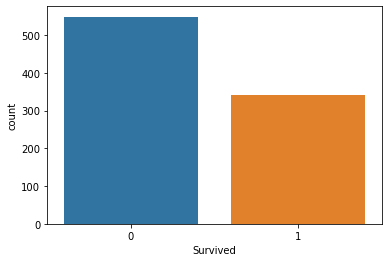

In [51]:
# Visulaize the number of survived
ax=sns.countplot(x='Survived',data=df4)
print(df4['Survived'].value_counts())

No. of survived is less than number of dead and dataset is not imbalanced as ration is 6:4

3    491
1    216
2    184
Name: Pclass, dtype: int64


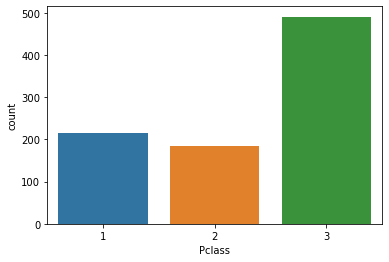

In [52]:
# Visulaize the number of Pclass
ax=sns.countplot(x='Pclass',data=df4)
print(df4['Pclass'].value_counts())

Pclass 3 passenger are more than other class

1    577
0    314
Name: Sex, dtype: int64


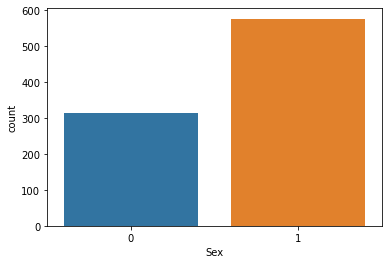

In [53]:
# Visulaize the number of sex
ax=sns.countplot(x='Sex',data=df4)
print(df4['Sex'].value_counts())

Male are more than female in the dataset

29    83
22    47
28    42
24    35
18    30
      ..
53     1
80     1
12     1
0      1
74     1
Name: Age, Length: 72, dtype: int64


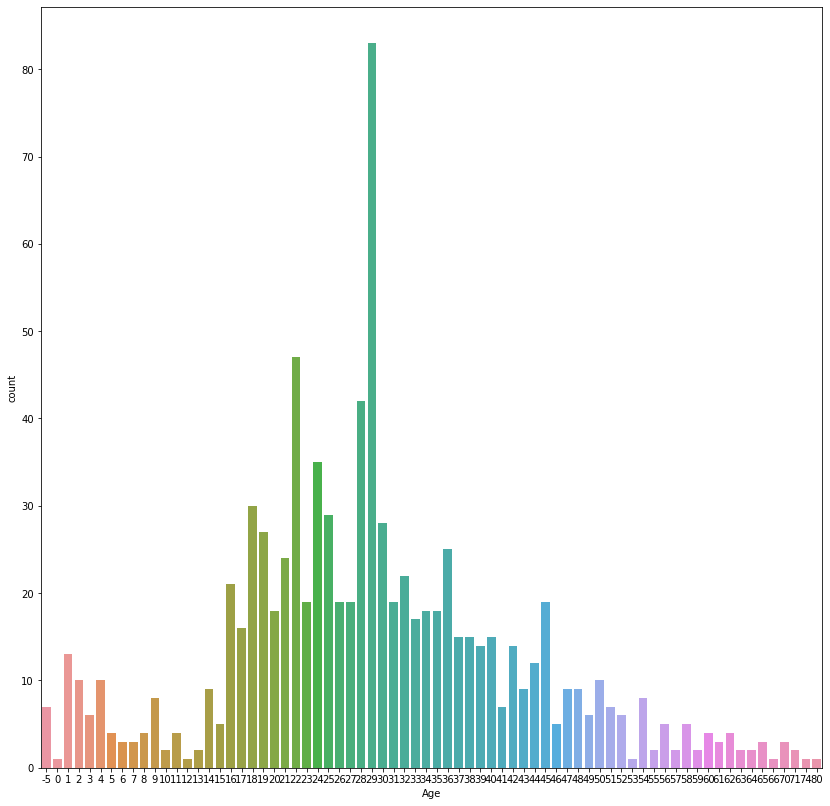

In [55]:
# Visulaize the number of sex
plt.figure(figsize=(14,14))
ax=sns.countplot(x='Age',data=df4)
print(df4['Age'].value_counts())

Mostly age range from 16 to 50

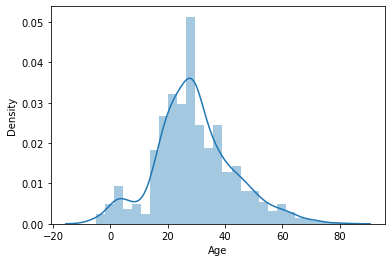

In [57]:
ax=sns.distplot(df4['Age'])

Distribution looks normal

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


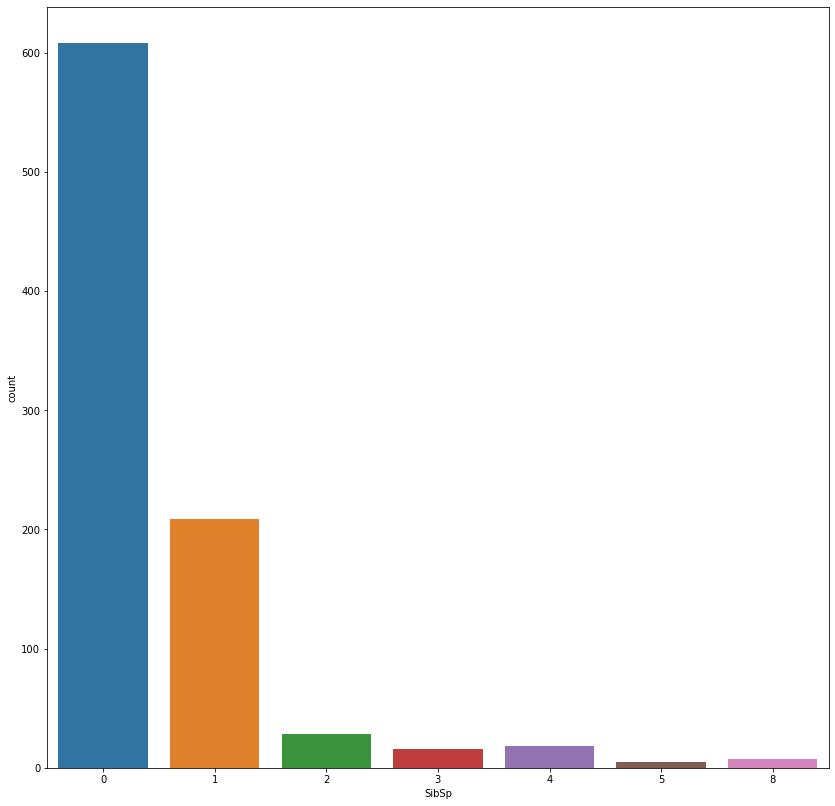

In [58]:
# Visulaize the number of sex
plt.figure(figsize=(14,14))
ax=sns.countplot(x='SibSp',data=df4)
print(df4['SibSp'].value_counts())

SibSp  value 0 is most frequent

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


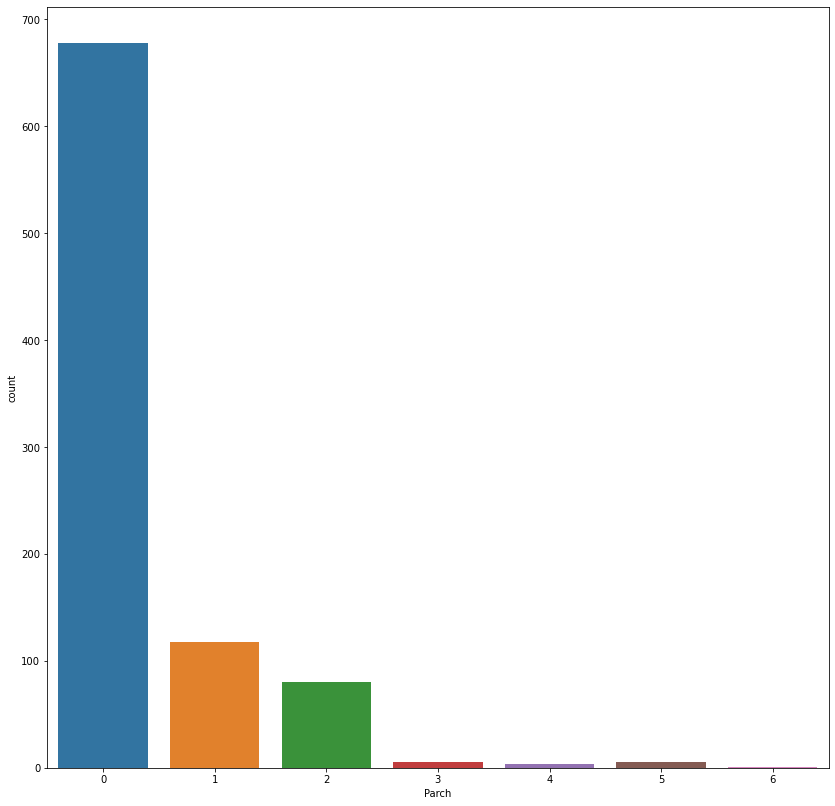

In [59]:
# Visulaize the number of sex
plt.figure(figsize=(14,14))
ax=sns.countplot(x='Parch',data=df4)
print(df4['Parch'].value_counts())

Parch value 0 is most frequent

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


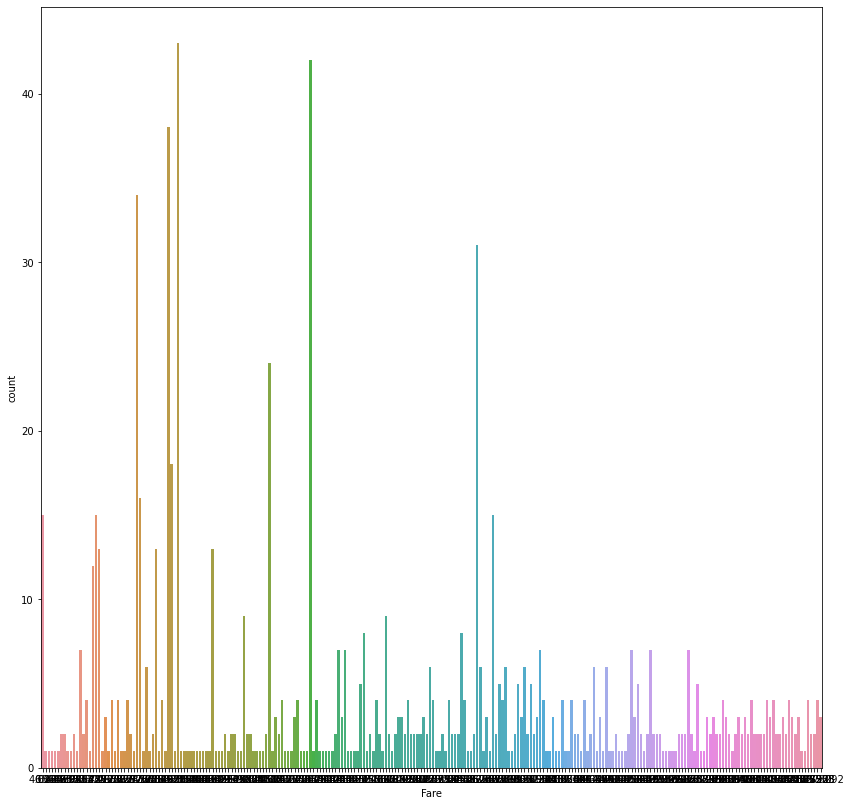

In [60]:
# Visulaize the number of sex
plt.figure(figsize=(14,14))
ax=sns.countplot(x='Fare',data=df4)
print(df4['Fare'].value_counts())

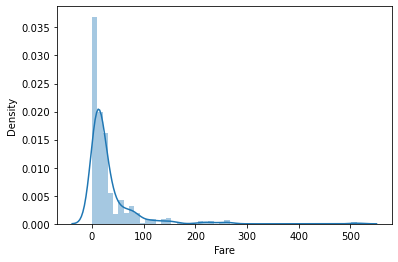

In [61]:
ax=sns.distplot(df4['Fare'])

Fare is right skewed

2    644
0    168
1     79
Name: Embarked, dtype: int64


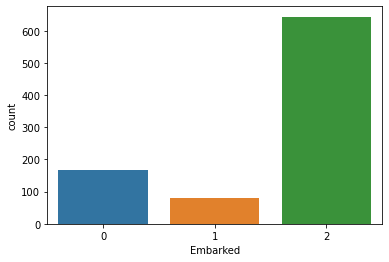

In [65]:
# Visulaize the number of sex
ax=sns.countplot(x='Embarked',data=df4)
print(df4['Embarked'].value_counts())

Most of the passenger Embarked from 2

## Bi-Varient Analysis

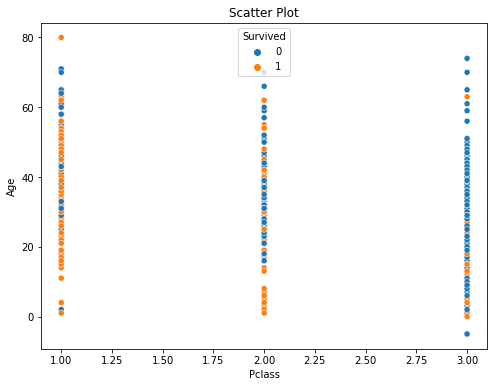

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Pclass', y='Age', hue='Survived')
plt.title('Scatter Plot')
plt.show()

As we can see from the graph Pclass 1 have high rate of surviver as Pclass 1 have more rich person

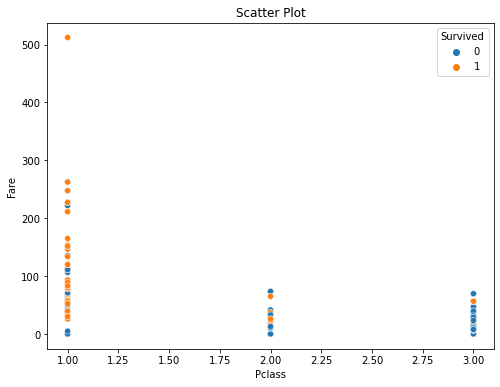

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Pclass', y='Fare', hue='Survived')
plt.title('Scatter Plot')
plt.show()

As Pclass 1 have higher fare and more survival rate compare to other 2

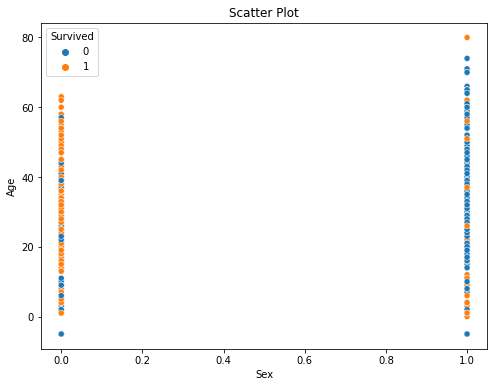

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Sex', y='Age', hue='Survived')
plt.title('Scatter Plot')
plt.show()

More female survived compare to men

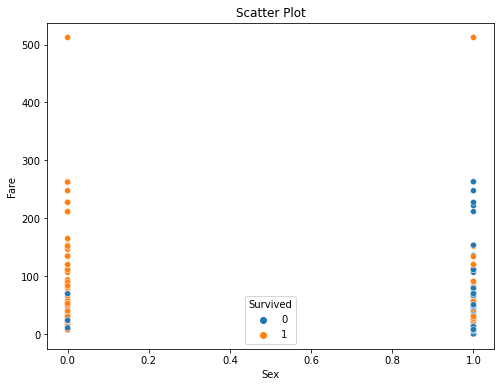

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Sex', y='Fare', hue='Survived')
plt.title('Scatter Plot')
plt.show()

Both male and feamle  have almost same fare 

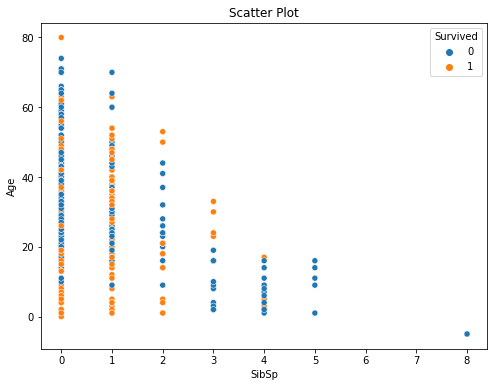

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='SibSp', y='Age', hue='Survived')
plt.title('Scatter Plot')
plt.show()

Low SibSp have high range of passenger age

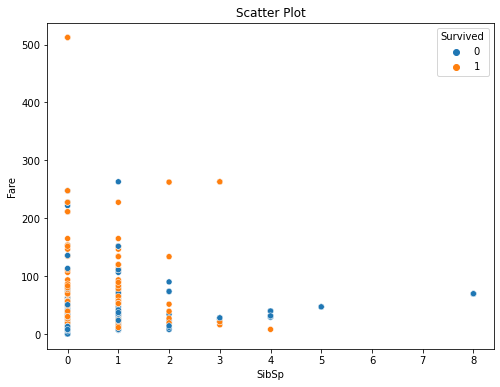

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='SibSp', y='Fare', hue='Survived')
plt.title('Scatter Plot')
plt.show()

Low SibSp have high Fare

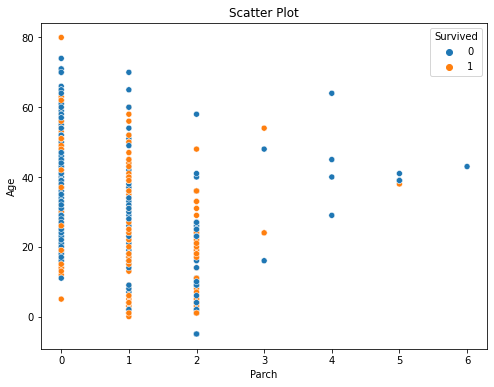

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Parch', y='Age', hue='Survived')
plt.title('Scatter Plot')
plt.show()

Low Parch have high range of passenger age

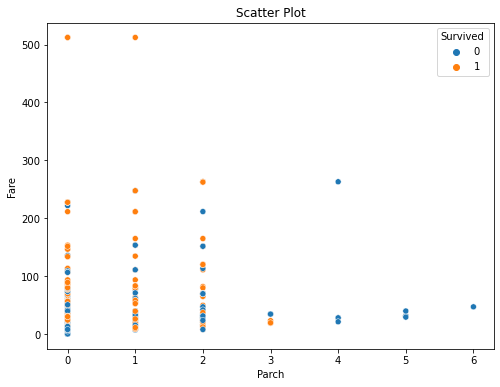

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Parch', y='Fare', hue='Survived')
plt.title('Scatter Plot')
plt.show()

Low Parch have high  Fare compare to high Parch

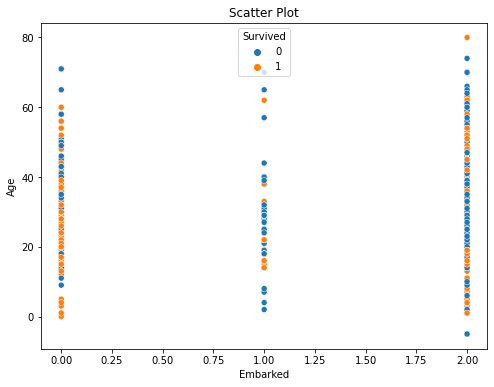

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Embarked', y='Age', hue='Survived')
plt.title('Scatter Plot')
plt.show()

More number of person survived Embarked from 0

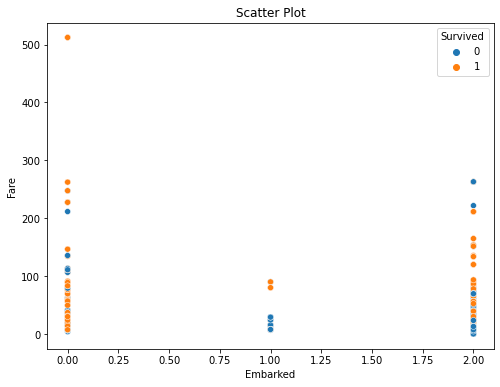

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='Embarked', y='Fare', hue='Survived')
plt.title('Scatter Plot')
plt.show()

High fare for person Embarked form 0

## Mutivarient analysis

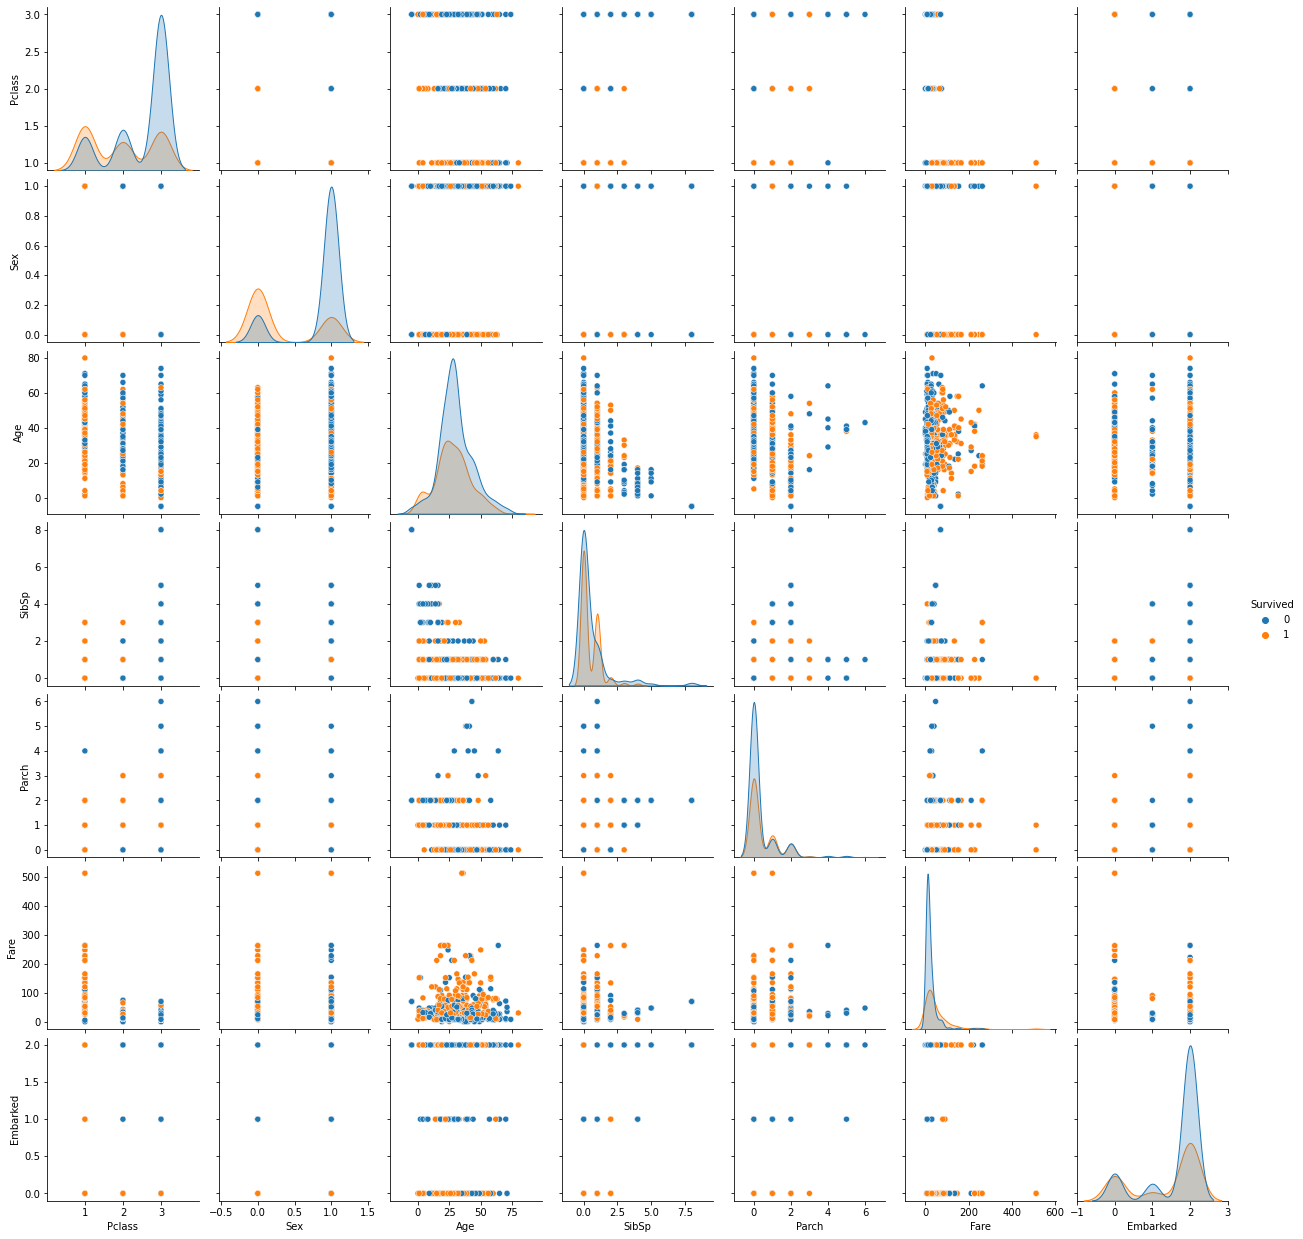

In [76]:
sns.pairplot(df4[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']],hue='Survived')

From the graph we can see that the distribution is not normal for
- Fare 
- Age
other are categorical variable.

In [193]:
# Checking Skewness
df4.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.344561
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.256969
Ticket_0    1.478153
Ticket_1    0.624082
Ticket_2    0.335115
Ticket_3    0.142008
Ticket_4    0.078757
Ticket_5    0.024735
Ticket_6   -0.020237
Ticket_7    0.060736
Ticket_8    0.056234
Ticket_9   -0.069744
dtype: float64

Skewness range from -0.5 to 0.5
- pclass
- sex
- SibSP
- Parch
- Fare
- Embarked

 are highly skewed except Fare all are categorical variable.

## Correlation

In [194]:
# Checking the correlation
df4.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9
Survived,1.000000,-0.338481,-0.543351,-0.079283,-0.035322,0.081629,0.257307,-0.171249,-0.083027,0.086336,-0.036445,0.009675,-0.029022,-0.036415,0.024338,-0.031485,-0.060960,0.000233
Pclass,-0.338481,1.000000,0.131900,-0.406993,0.083081,0.018443,-0.549500,0.166521,0.043852,-0.086110,-0.051244,0.008678,0.042748,0.016650,0.048654,-0.035834,0.019774,0.079874
Sex,-0.543351,0.131900,1.000000,0.117753,-0.114631,-0.245489,-0.182333,0.112094,0.127218,-0.028026,0.038577,0.046629,-0.043107,0.009688,0.021549,0.001140,-0.001904,-0.026035
Age,-0.079283,-0.406993,0.117753,1.000000,-0.378659,-0.218669,0.093074,-0.020208,0.042499,0.095025,0.115118,0.031111,0.034418,0.032919,-0.005510,0.018505,-0.004159,-0.083847
SibSp,-0.035322,0.083081,-0.114631,-0.378659,1.000000,0.414838,0.159651,0.069568,-0.173793,-0.118823,-0.063103,-0.160332,-0.068989,0.099553,-0.029235,0.016424,-0.019279,0.087413
Parch,0.081629,0.018443,-0.245489,-0.218669,0.414838,1.000000,0.216225,0.041137,-0.162982,-0.091750,-0.104393,-0.089329,-0.034360,0.069938,0.092741,-0.038604,0.046745,0.095030
Fare,0.257307,-0.549500,-0.182333,0.093074,0.159651,0.216225,1.000000,-0.227421,-0.142590,0.030805,-0.030186,0.006843,-0.034521,-0.021157,0.004897,-0.052652,-0.010399,-0.000478
Embarked,-0.171249,0.166521,0.112094,-0.020208,0.069568,0.041137,-0.227421,1.000000,0.071590,-0.092759,0.029531,0.045021,-0.030242,-0.000175,0.035739,0.080080,-0.020782,0.019076
Ticket_0,-0.083027,0.043852,0.127218,0.042499,-0.173793,-0.162982,-0.142590,0.071590,1.000000,-0.371551,-0.189886,-0.084461,-0.038777,-0.018874,-0.019049,0.006935,0.011382,-0.009204
Ticket_1,0.086336,-0.086110,-0.028026,0.095025,-0.118823,-0.091750,0.030805,-0.092759,-0.371551,1.000000,0.058734,0.059234,-0.006364,0.006734,0.004322,0.034070,-0.028736,-0.023266


<AxesSubplot:>

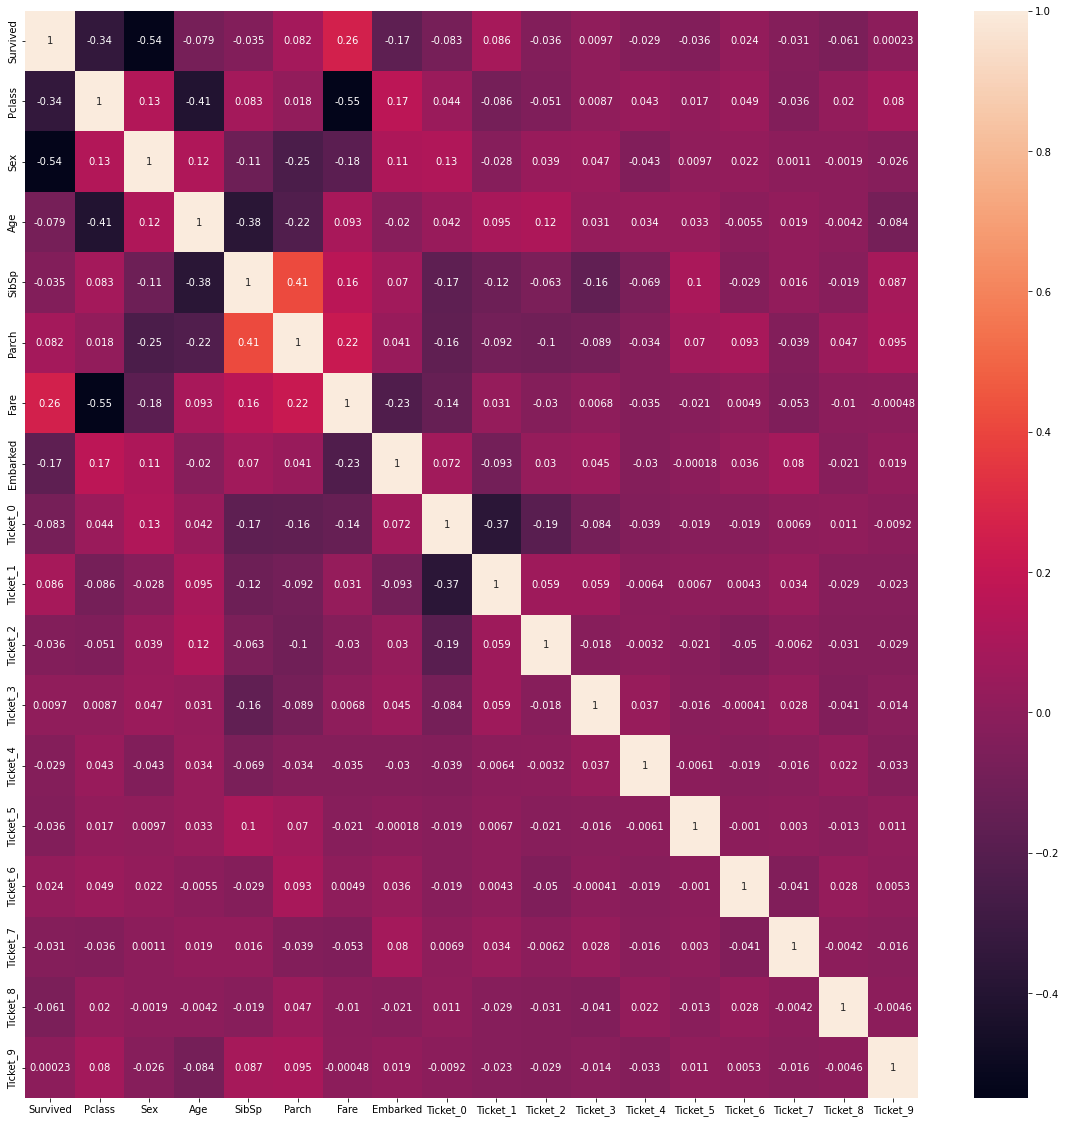

In [196]:
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),annot=True)

As we see heatmap there no high correlation between any two features, which means no multicolinearity

In [200]:
# Correlation between feautres and labels
df4.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Ticket_1    0.086336
Parch       0.081629
Ticket_6    0.024338
Ticket_3    0.009675
Ticket_9    0.000233
Ticket_4   -0.029022
Ticket_7   -0.031485
SibSp      -0.035322
Ticket_5   -0.036415
Ticket_2   -0.036445
Ticket_8   -0.060960
Age        -0.079283
Ticket_0   -0.083027
Embarked   -0.171249
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

## Checking the outliers

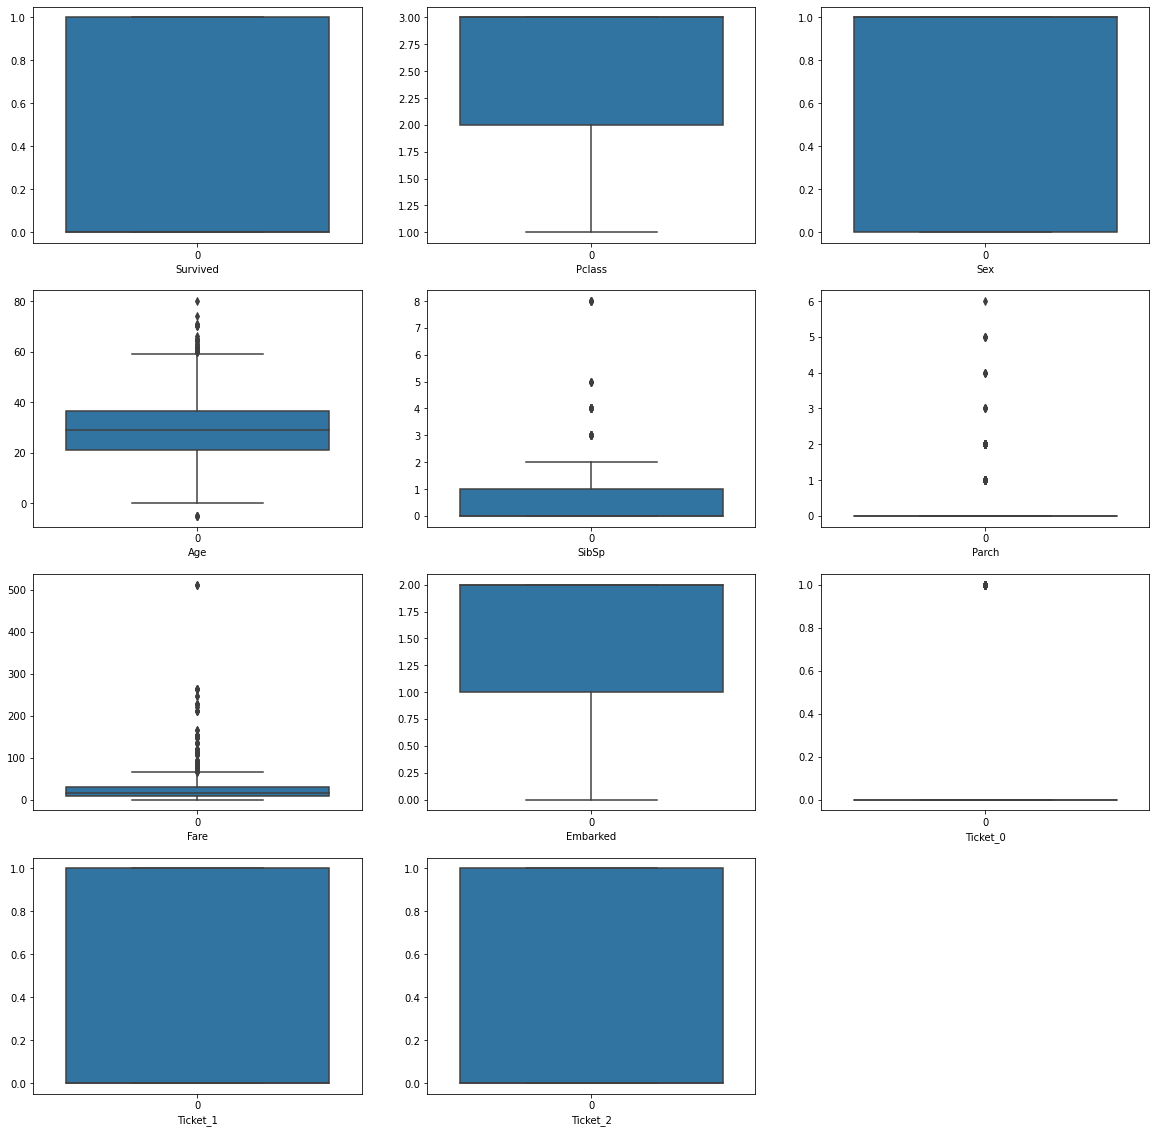

In [77]:
plt.figure(figsize=(20,20))
p=1
for i in df4.columns[:-1]:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.boxplot(data=df4[i])
        plt.xlabel(i)
    p+=1
plt.show()

As we can see there are outliers in fare and age 
all the others outliers are outlooked as those are categorical features

## Treating skewness

In [105]:
x=df4.drop('Survived',axis=1)
y=df4['Survived']

In [106]:
#transform the data to remove skewness 
from sklearn.preprocessing import power_transform
x=power_transform(x)

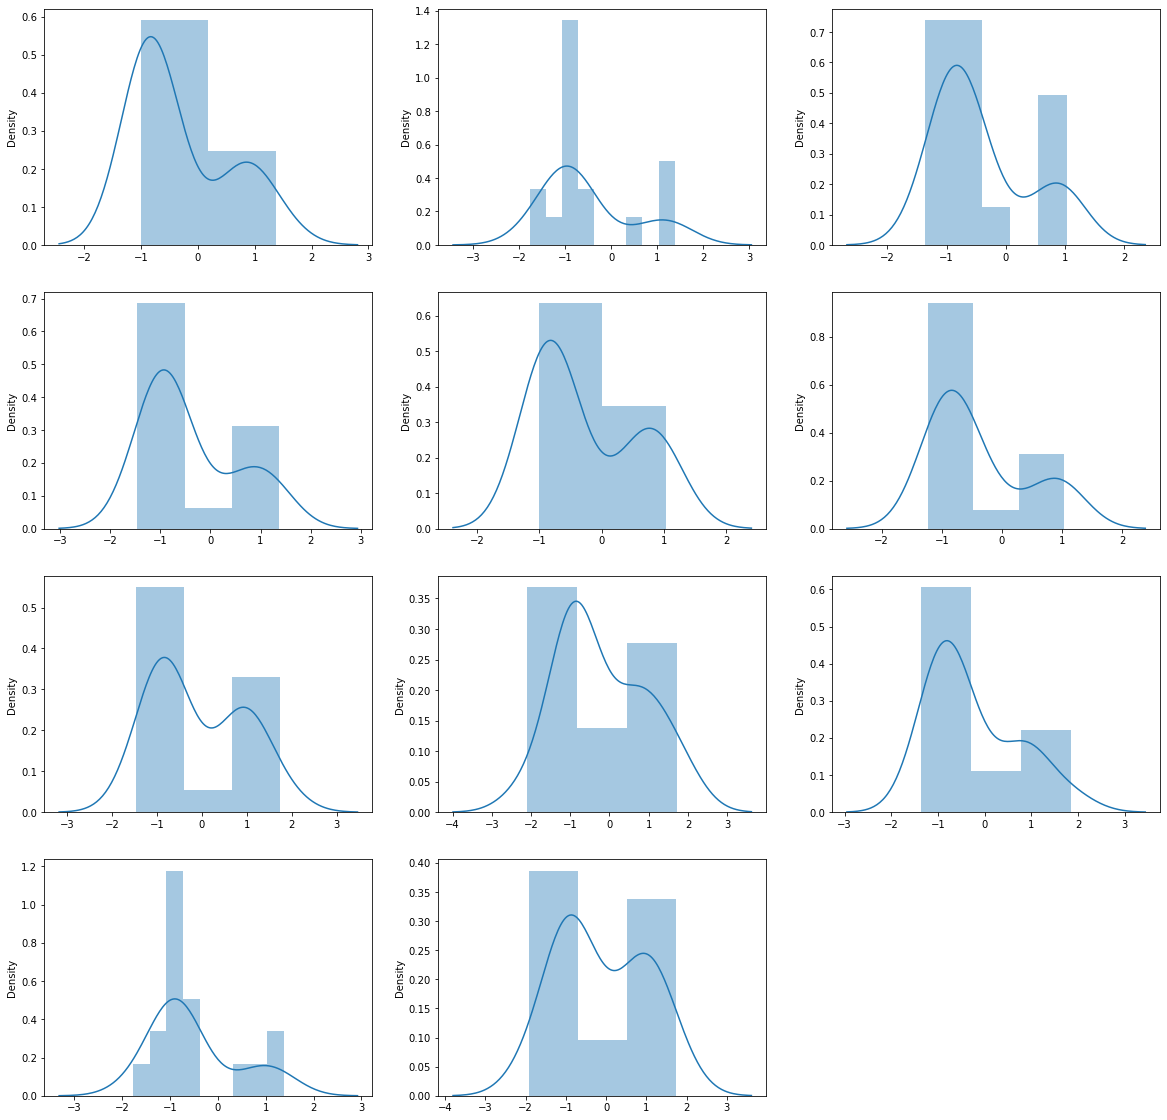

In [107]:
# again ploting the graph to checking the skewness 
plt.figure(figsize=(20,20))
p=1
for i in x:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.distplot(i)
    p+=1
plt.show()

In [108]:
# converting the np.array to dataframe for further analysis
x=pd.DataFrame(x, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Ticket_0', 'Ticket_1', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8', 'Ticket_9'])

In [110]:
# skewness is in desired range
x.skew()

Pclass     -0.441438
Sex        -0.618921
Age         0.105631
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -1.053792
Ticket_0    1.478153
Ticket_1    0.624082
Ticket_2    0.335115
Ticket_3    0.142008
Ticket_4    0.078757
Ticket_5    0.024735
Ticket_6   -0.020237
Ticket_7    0.060736
Ticket_8    0.056234
Ticket_9   -0.069744
dtype: float64

As we can see skewness is still there so we use cuberoot transform

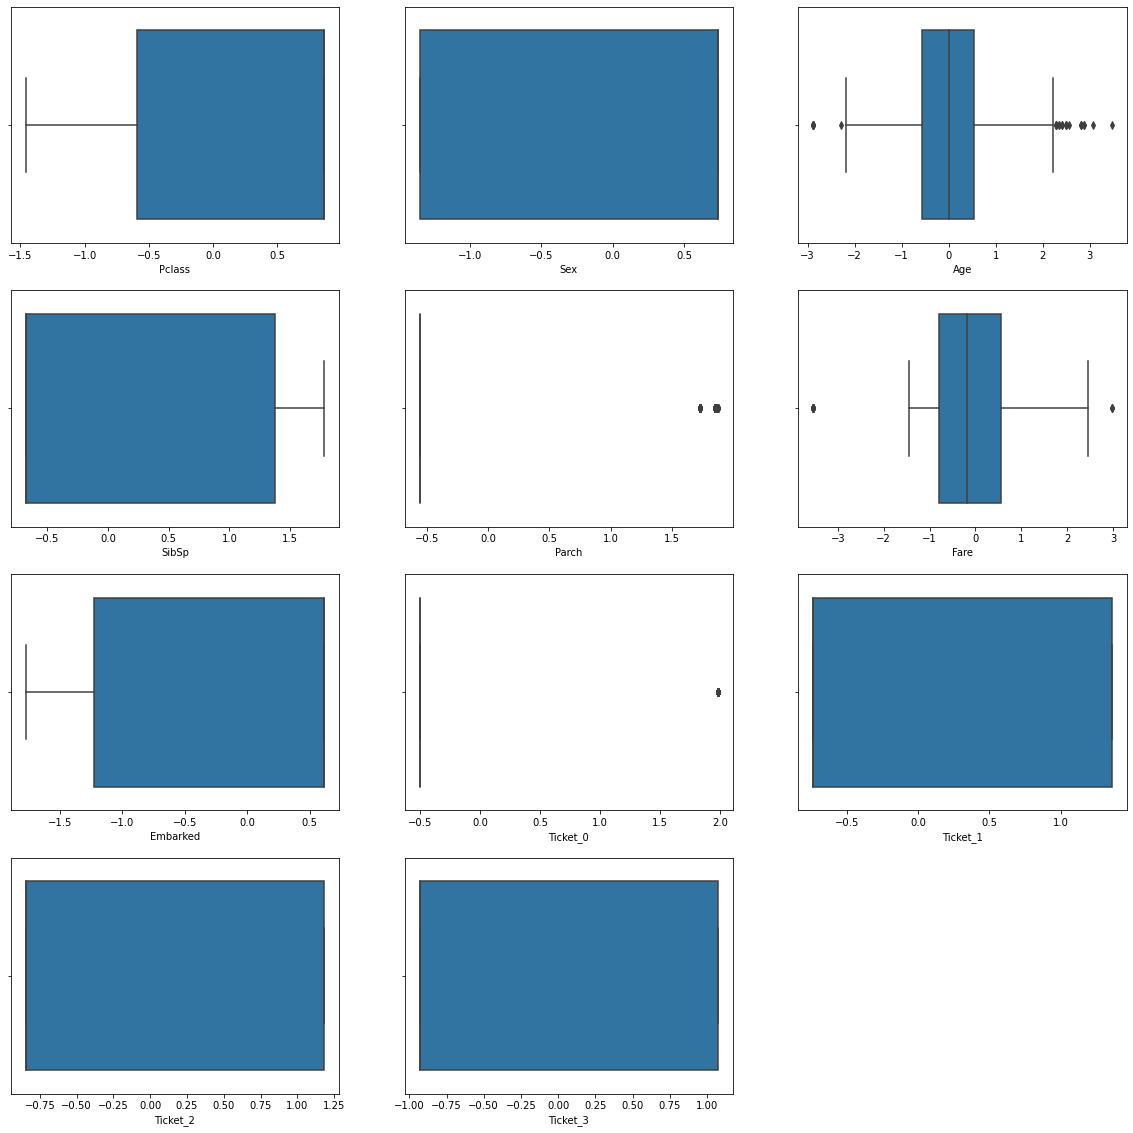

In [109]:
plt.figure(figsize=(20,20))
p=1
for i in x.columns:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.boxplot(x[i])
        plt.xlabel(i)
    p+=1
plt.show()

Outliers in  fare and Age

## Z-score

In [111]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(891, 17)

In [112]:
Threshold=3
print(np.where(z>3))

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
       806, 815, 822, 851], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int64))


In [113]:
Threshold = 3
outlier_indices = np.where(z > 3)[0]

In [114]:
# df1=x[(z<3).all(axis=1)]
# print(x.shape)


df1 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(df1.shape)

(891, 17)
(874, 17)


Removing 17 outliers from x and y both 

In [115]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)


(874,)


## PCA

In [123]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df1)

array([[-0.37640109, -1.65411046, -0.00967473, ..., -0.55518504,
        -0.09071101, -0.53189764],
       [ 2.22731383,  1.17790099,  1.76853647, ..., -0.48889807,
        -0.19399294, -0.17665103],
       [-0.59567537, -1.15768462,  0.2121909 , ..., -1.34305034,
         0.0233914 , -0.09191056],
       ...,
       [ 1.02529339, -2.23764306,  1.18625593, ...,  1.38241841,
         1.35779234,  0.32679864],
       [-0.51799311,  1.14832962,  1.9950507 , ...,  1.02448855,
        -0.86719887, -0.23350634],
       [-1.93178887, -0.52322385,  0.86616993, ...,  1.04997181,
         0.31810269,  0.1337347 ]])

### Scree plot

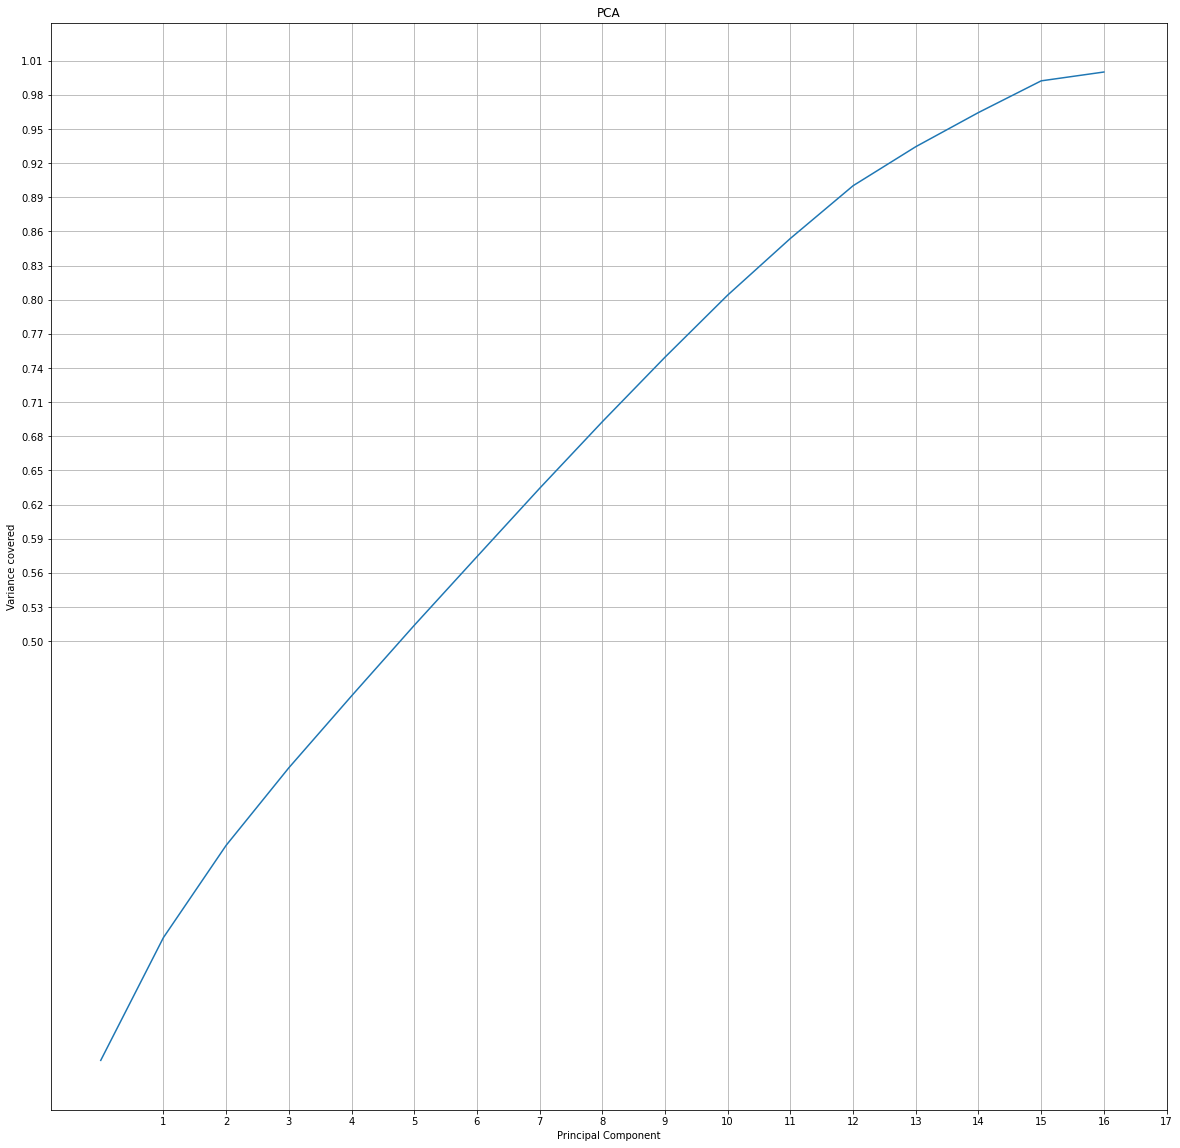

In [124]:
plt.figure(figsize=(20,20))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # np.cumsum is for cumulative of all.
plt.xlabel('Principal Component')
plt.grid('both')
plt.yticks(np.arange(0.5,1.03,0.03))
plt.xticks(range(1,18,1))
plt.ylabel('Variance covered')
plt.title("PCA")
plt.show()


As from the graph we can see 15 component can cover more than 98.4% of the data.

In [125]:
pca=PCA(n_components=15)
new_pcom=pca.fit_transform(df1)

In [126]:
princi_comp=pd.DataFrame(new_pcom,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.376401,-1.654110,-0.009675,-0.462938,-0.911776,-0.925269,1.469587,0.084221,0.342330,0.040445,-0.365284,1.758755,0.034709,-1.484692,-0.555185
1,2.227314,1.177901,1.768536,1.730966,-0.155920,-0.095256,0.537140,0.647614,1.271221,0.630731,-1.278210,0.260444,0.306278,-1.528341,-0.488898
2,-0.595675,-1.157685,0.212191,0.843655,-0.393859,-0.596965,0.699939,0.984388,0.747807,-0.789253,-0.560624,0.255933,2.099410,-0.693035,-1.343050
3,1.788976,0.884492,1.463739,-1.121860,0.853605,-0.770640,0.605765,0.628940,1.192138,1.200661,0.479902,0.682388,0.687353,-1.401311,-0.711051
4,-1.434457,-0.472465,0.159179,-1.043244,-0.075017,-1.109282,0.943245,0.281516,1.125082,-0.515145,0.569361,1.025219,-0.040616,-0.481574,-1.584214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,-1.589434,0.432192,1.709841,0.188218,0.702314,-0.669749,-0.669149,2.415705,-0.191511,0.455373,0.488796,0.323320,-0.493762,0.844423,0.881930
870,-0.004857,0.282115,1.875910,0.406755,0.830192,-1.402323,0.016470,2.265674,-0.070405,-1.191856,1.212692,-0.577385,0.800342,0.940906,0.989172
871,1.025293,-2.237643,1.186256,-0.066446,2.525406,-0.427887,0.352070,0.949063,-0.505004,-1.196827,-0.138607,-0.200229,0.415989,0.227475,1.382418
872,-0.517993,1.148330,1.995051,1.688835,-1.005598,0.147943,1.055141,0.163658,-0.656602,1.379767,1.242470,-0.443043,-1.500524,0.976606,1.024489


## oversampling

In [127]:
y.value_counts()

0    534
1    340
Name: Survived, dtype: int64

In [128]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
princi_comp,y=SM.fit_resample(princi_comp,y)

In [129]:
y.value_counts()

0    534
1    534
Name: Survived, dtype: int64

In [130]:
princi_comp.shape

(1068, 15)

In [131]:
x=princi_comp

balancing the imbalance dataset.

In [206]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Modeling

### Find the best random state

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print("Best accuracy is",maxAccu,"at random_state",maxRS)
   

Best accuracy is 0.8255451713395638 at random_state 133


In [133]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [134]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [135]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [136]:
training_score = []
testing_score = []

In [137]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 76.97456492637215
Accuracy_Score of LogisticRegression() model on Testing Data is: 82.55451713395638

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8431372549019608
Recall Score of LogisticRegression() model is: 0.8012422360248447
F1 Score of LogisticRegression() model is: 0.8216560509554139

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


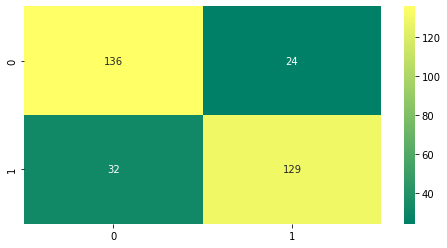

In [138]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 88.21954484605087
Accuracy_Score of SVC() model on Testing Data is: 85.35825545171339

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.85625
Recall Score of SVC() model is: 0.8509316770186336
F1 Score of SVC() model is: 0.853582554517134

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


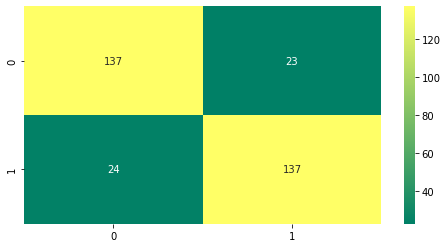

In [139]:
model_prediction(SVC())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 76.32398753894081

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7607361963190185
Recall Score of DecisionTreeClassifier() model is: 0.7701863354037267
F1 Score of DecisionTreeClassifier() model is: 0.7654320987654321

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


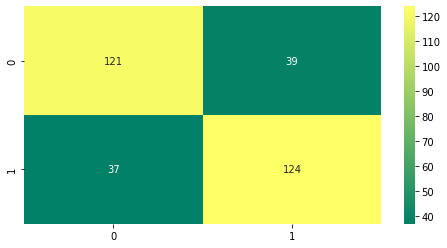

In [140]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 87.85046728971963

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8630952380952381
Recall Score of RandomForestClassifier() model is: 0.9006211180124224
F1 Score of RandomForestClassifier() model is: 0.8814589665653496

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


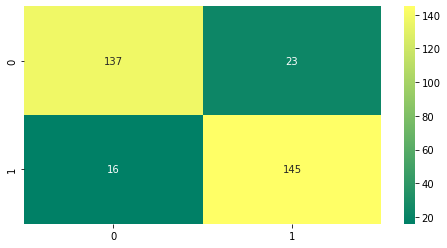

In [141]:
model_prediction(RandomForestClassifier())

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 88.78504672897196

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.874251497005988
Recall Score of ExtraTreesClassifier() model is: 0.906832298136646
F1 Score of ExtraTreesClassifier() model is: 0.8902439024390244

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


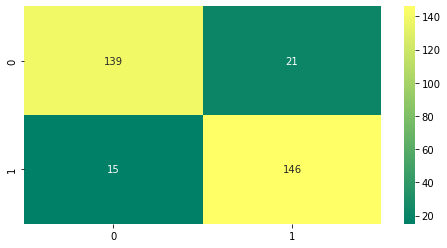

In [142]:
model_prediction(ExtraTreesClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 87.14859437751004
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 81.93146417445483

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.8011695906432749
Recall Score of AdaBoostClassifier() model is: 0.8509316770186336
F1 Score of AdaBoostClassifier() model is: 0.8253012048192772

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


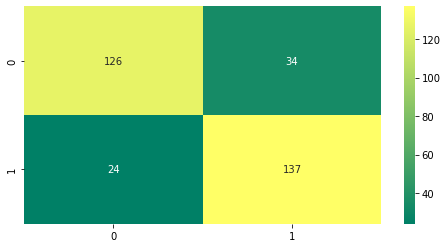

In [143]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.78714859437751
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 84.11214953271028

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8395061728395061
Recall Score of GradientBoostingClassifier() model is: 0.84472049689441
F1 Score of GradientBoostingClassifier() model is: 0.8421052631578948

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


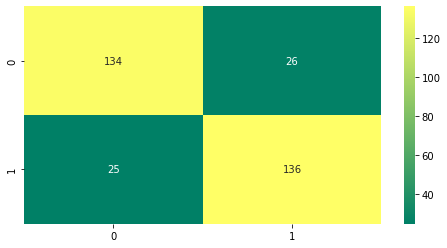

In [144]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_round

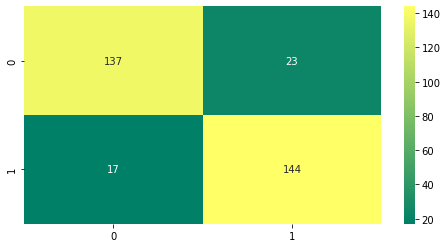

In [145]:
model_prediction(XGBClassifier())

In [146]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest","Extra Tree","Ada Boost",
          "Gradient Boost","XGBoost"]

In [147]:
df5 = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [148]:
df5

,Algorithms,Training Score,Testing Score
0,Logistic Regression,76.974565,82.554517
1,SVM,88.219545,85.358255
2,Decision Tree,100.000000,76.323988
3,Random Forest,100.000000,87.850467
4,Extra Tree,100.000000,88.785047
5,Ada Boost,87.148594,81.931464
6,Gradient Boost,96.787149,84.112150
7,XGBoost,100.000000,87.538941


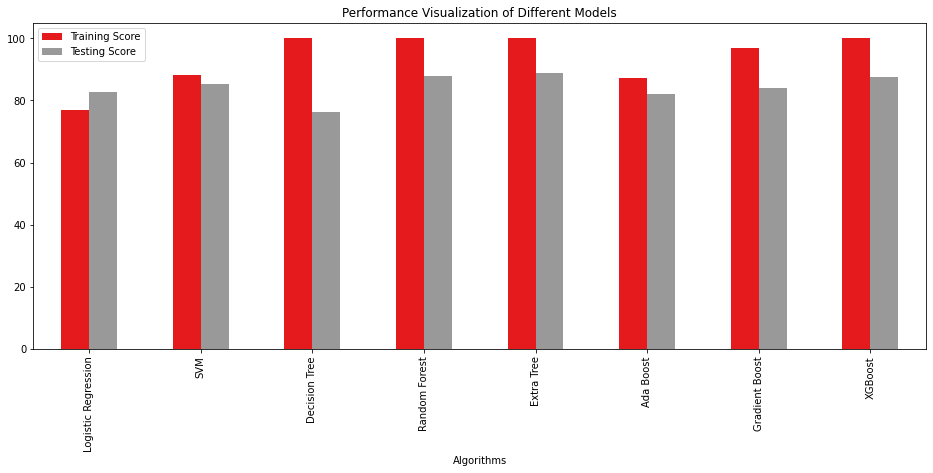

In [149]:
df5.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Cross validation

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
# checking cv score for logistic Regression
score = cross_val_score(LogisticRegression(),x,y)
print(score)
print(score.mean())
print(testing_score[0]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[0]/100)- score.mean())

[0.73364486 0.77570093 0.71028037 0.77934272 0.72769953]
0.7453336843490852
0.8255451713395638
Differnet between Accuracy score and cross validation score is-  0.08021148699047864


In [152]:
# checking cv score for SVC
score = cross_val_score(SVC(),x,y)
print(score)
print(score.mean())
print(testing_score[1]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[1]/100)- score.mean())

[0.76168224 0.78971963 0.75700935 0.8028169  0.73239437]
0.768724496511781
0.8535825545171339
Differnet between Accuracy score and cross validation score is-  0.08485805800535295


In [153]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[2]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[2]/100)- score.mean())

[0.63551402 0.71495327 0.70560748 0.69483568 0.66197183]
0.6825764556184459
0.7632398753894081
Differnet between Accuracy score and cross validation score is-  0.08066341977096214


In [154]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RandomForestClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[3]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[3]/100)- score.mean())

[0.78037383 0.71028037 0.75233645 0.84037559 0.68544601]
0.7537624500899478
0.8785046728971964
Differnet between Accuracy score and cross validation score is-  0.12474222280724856


In [155]:
# checking cv score for ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[4]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[4]/100)- score.mean())

[0.8271028  0.76168224 0.76168224 0.8685446  0.77464789]
0.7987319555965073
0.8878504672897196
Differnet between Accuracy score and cross validation score is-  0.08911851169321228


In [156]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[5]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[5]/100)- score.mean())

[0.74766355 0.73364486 0.62149533 0.76525822 0.69014085]
0.7116405598701242
0.8193146417445483
Differnet between Accuracy score and cross validation score is-  0.10767408187442407


In [157]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GradientBoostingClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[6]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[6]/100)- score.mean())

[0.77102804 0.71962617 0.71962617 0.77934272 0.57276995]
0.7124786099776227
0.8411214953271028
Differnet between Accuracy score and cross validation score is-  0.1286428853494801


In [158]:
# checking cv score for XGBClassifier
score = cross_val_score(XGBClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[7]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[7]/100)- score.mean())

[0.80373832 0.70093458 0.76168224 0.80751174 0.61032864]
0.7368391031547541
0.8753894080996885
Differnet between Accuracy score and cross validation score is-  0.13855030494493437


RandomForestClassifier is the best model with very less diffrenecr between both the value and high scores

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
model1 = LogisticRegression()
parameters1 ={"penalty":['l1', 'l2', 'elasticnet', None],
             "fit_intercept":[True,False],
             'class_weight':['dict','balanced',None],
             'max_iter':[50,100,200],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)
grid_search1.fit(x_train,y_train.values.ravel())
grid_search1.best_score_

0.7683847874720356

In [161]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'class_weight': 'balanced',
 'fit_intercept': True,
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'saga'}

In [162]:
model1 = LogisticRegression(**best_parameters1)

In [163]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

accuracy_score(y_test,x_test_pred1)

0.8255451713395638

In [164]:
model2 = GradientBoostingClassifier()
parameters2 ={'loss':['log_loss', 'deviance', 'exponential'],
             'learning_rate':[0.001,0.005,.01,.02,.03],
             'n_estimators':[25,50,75,100,150],
             'criterion':['friedman_mse', 'squared_error'],
             'min_samples_split':[1,2,3,4]}



grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-2)
grid_search2.fit(x_train,y_train.values.ravel())
grid_search2.best_score_

0.7951856823266219

In [165]:
best_parameters2 = grid_search2.best_params_
best_parameters2

model2 = GradientBoostingClassifier(**best_parameters2)

model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

accuracy_score(y_test,x_test_pred2)

0.8255451713395638

In [166]:
model3 = RandomForestClassifier()

In [167]:
parameters3 = {'n_estimators': [100,50,25],
                'min_samples_split':[1,2,3],
                'max_depth': [10,11,12,None], 
                'min_samples_leaf':[1,2,3]}

In [168]:
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)

In [169]:
grid_search3.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 50, 25]})

In [170]:
grid_search3.best_score_

0.8259686800894854

In [171]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [172]:
model3 = RandomForestClassifier(**best_parameters3)

In [173]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [174]:
x_test_pred3 = model3.predict(x_test)

In [175]:
accuracy_score(y_test,x_test_pred3)

0.8722741433021807

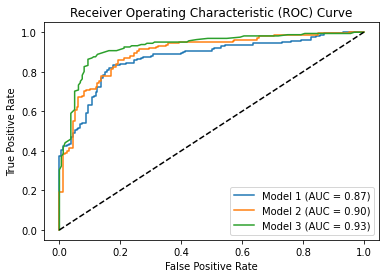

AUC Score for Model 1: 0.8256211180124223
AUC Score for Model 2: 0.8255046583850931
AUC Score for Model 3: 0.872166149068323


In [176]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# Calculate and plot ROC curve for model1
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % roc_auc1)

# Calculate and plot ROC curve for model2
y_pred_prob2 = model2.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='Model 2 (AUC = %0.2f)' % roc_auc2)

# Calculate and plot ROC curve for model3
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Model 3 (AUC = %0.2f)' % roc_auc3)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC scores
auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
print('AUC Score for Model 1:', auc_score1)

auc_score2 = roc_auc_score(y_test, model2.predict(x_test))
print('AUC Score for Model 2:', auc_score2)

auc_score3 = roc_auc_score(y_test, model3.predict(x_test))
print('AUC Score for Model 3:', auc_score3)


In [177]:
# Saving the model using .pkl
import joblib
joblib.dump(model3,"Titanic.pkl")


['Titanic.pkl']

In [178]:
# Let's load the saved model and get the predictions
model=joblib.load("Titanic.pkl")

In [179]:
# Prediction
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [180]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
316,0,0
317,0,0
318,1,0
319,1,1
